In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [6]:
import pycaret
import joblib

In [9]:
from pycaret.regression import *

ImportError: cannot import name '_joblib_parallel_args' from 'sklearn.utils.fixes' (C:\Users\SOUMYA\.conda\envs\tf_gpu\lib\site-packages\sklearn\utils\fixes.py)

In [8]:
from sklearn.utils.fixes import _joblib_parallel_args

ImportError: cannot import name '_joblib_parallel_args' from 'sklearn.utils.fixes' (C:\Users\SOUMYA\.conda\envs\tf_gpu\lib\site-packages\sklearn\utils\fixes.py)

In [ ]:
s = setup(data, target = 'charges', session_id = 123)

In [ ]:
lr = create_model('lr')

In [ ]:
plot_model(lr)

# Experiment 2

In [8]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
s2[0].columns

Index(['age_Power2', 'bmi_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'smoker_yes_multiply_bmi_5.0',
       'region_southeast_multiply_age_Power2',
       'bmi_Power2_multiply_smoker_yes', 'age_Power2_multiply_smoker_yes',
       'children_0_multiply_bmi_Power2',
       'region_southeast_multiply_bmi_Power2',
       'children_0_multiply_smoker_yes', 'sex_female_multiply_bmi_Power2',
       'region_southeast_multiply_smoker_yes',
       'smoker_yes_multiply_children_0', 'smoker_yes_multiply_bmi_Power2',
       'children_0

In [10]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2476.5333,1.792665e+07,4233.9880,0.8929,0.3878,0.2842
1,3355.1345,3.404316e+07,5834.6515,0.8021,0.4613,0.3304
2,2919.7578,2.261994e+07,4756.0423,0.7136,0.5533,0.3790
3,2964.9649,2.283861e+07,4778.9761,0.8093,0.5456,0.4029
4,3097.0904,2.838265e+07,5327.5369,0.7889,0.5248,0.2831
5,2979.1330,2.035337e+07,4511.4710,0.8691,0.3543,0.2744
6,2687.7389,2.234181e+07,4726.7128,0.8480,0.4020,0.3279
7,3123.5060,2.697542e+07,5193.7863,0.8517,0.4707,0.3089
8,2813.0890,2.055905e+07,4534.2087,0.8672,0.3759,0.3151
9,3110.4590,2.651683e+07,5149.4496,0.8292,0.4661,0.3353


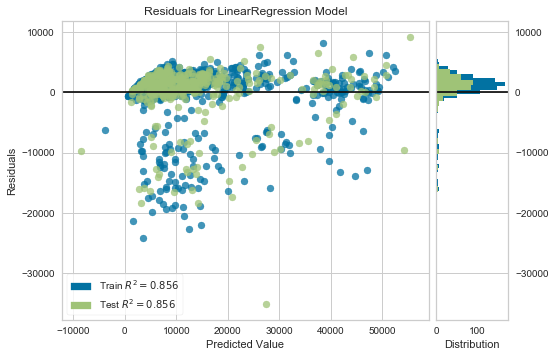

In [11]:
plot_model(lr)

In [12]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


In [13]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Sucessfully Loaded


In [14]:
deployment_28042020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

In [16]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
